# Trabalho de Aprendizado de Máquina
Aluno: **Bruno da Cunha Ferreira**

## Contextualização sobre o trabalho
> - Escolher duas bases de dados para a tarefa de aprendizado supervisionado do tipo classificação.
> - Para cada base de dados, efetuar o _pipeline_ completo de aprendizado de máquina para os seguintes métodos: K-NN, Naive Bayes, Árvore de decisão. 
> - Lembre-se de separar seus dados em conjuntos de treinamento e teste, utilizando alguma metodologia vista em aula para a partição: hold-out, k-fold cross validation, etc. 
> - Discutir os resultados obtidos quanto ao desempenho estimado e comparar os diferentes métodos.

In [571]:
#--- Bibliotecas ---#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import csv
from scipy.io import arff

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, classification_report, auc, roc_auc_score, f1_score

In [572]:
#--- ignore warnings on Github ---#
import warnings
warnings.filterwarnings('ignore')

In [573]:
#--- Debug Mode ---#
%xmode Verbose # habilita debugar de forma completa os erros que vierem aparecer

## As bases de dados escolhidas

### Importando as bases de dados para este trabalho

In [574]:
# Converter a separação de ";" para "," no arquivo csv
with open('./lib/divorce/divorce.csv', newline='', encoding='utf-8') as input_file, open('./lib/divorce/divorcio.csv', 'w', newline='', encoding='utf-8') as output_file:
    reader = csv.reader(input_file, delimiter=';')
    writer = csv.writer(output_file, delimiter=',')
    for row in reader:
        writer.writerow(row)


### Base preditiva para Divórcio

In [575]:
divorce = pd.read_csv('./lib/divorce/divorcio.csv') # https://archive.ics.uci.edu/dataset/497/divorce+predictors+data+set
divorce.head() # 170 instâncias para 54 Atributos

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


#### Definição dos Atributos
1. Se um de nós pedir desculpas quando nossa discussão piorar, a discussão termina.
2. Sei que podemos ignorar nossas diferenças, mesmo que às vezes as coisas fiquem difíceis.
3. Quando precisarmos, podemos retomar nossas discussões com meu cônjuge desde o início e corrigi-lo.
4. Quando discuto com meu cônjuge, entrar em contato com ele acabará funcionando.
5. O tempo que passei com minha esposa é especial para nós.
6. Não temos tempo em casa como parceiros.
7. Somos como dois estranhos que compartilham o mesmo ambiente em casa e não na família.
8. Aproveito as férias com minha esposa.
9. Gosto de viajar com minha esposa.
10. A maioria dos nossos objetivos são comuns ao meu cônjuge.
11. Acho que um dia no futuro, quando olhar para trás, verei que meu cônjuge e eu estivemos em harmonia um com o outro.
12. Minha esposa e eu temos valores semelhantes em termos de liberdade pessoal.
13. Minha esposa e eu temos um senso de entretenimento semelhante.
14. A maioria de nossos objetivos para as pessoas (filhos, amigos, etc.) são os mesmos.
15. Nossos sonhos com meu cônjuge são semelhantes e harmoniosos.
16. Somos compatíveis com meu cônjuge sobre o que o amor deve ser.
17. Compartilhamos as mesmas opiniões sobre ser feliz em nossa vida com meu cônjuge
18. Minha esposa e eu temos ideias semelhantes sobre como o casamento deve ser
19. Minha esposa e eu temos ideias semelhantes sobre como os papéis devem ser no casamento
20. Minha esposa e eu temos valores semelhantes em confiança.
21. Sei exatamente do que minha esposa gosta.
22. Sei como meu cônjuge quer ser cuidado quando está doente.
23. Conheço a comida favorita do meu cônjuge.
24. Posso lhe dizer que tipo de estresse meu cônjuge está enfrentando em sua vida.
25. Conheço o mundo interior de meu cônjuge.
26. Conheço as ansiedades básicas de meu cônjuge.
27. Eu sei quais são as fontes atuais de estresse do meu cônjuge.
28. Conheço as esperanças e desejos de meu cônjuge.
29. Conheço muito bem meu cônjuge.
30. Conheço os amigos de meu cônjuge e seus relacionamentos sociais.
31. Sinto-me agressivo quando discuto com meu cônjuge.
32. Ao discutir com meu cônjuge, costumo usar expressões como 'você sempre' ou 'você nunca'.
33. Posso usar declarações negativas sobre a personalidade de meu cônjuge durante nossas conversas.
34. Posso usar expressões ofensivas durante nossas conversas.
35. Posso insultar meu cônjuge durante nossas discussões.
36. Posso ser humilhante quando discutimos.
37. Minha discussão com meu cônjuge não é calma.
38. Odeio a maneira como meu cônjuge abre um assunto.
39. Nossas discussões geralmente ocorrem de repente.
40. Estamos apenas começando uma discussão antes que eu saiba o que está acontecendo.
41. Quando converso com meu cônjuge sobre algo, minha calma se quebra repentinamente.
42. Quando discuto com meu cônjuge, só saio e não digo uma palavra.
43. Eu principalmente fico em silêncio para acalmar um pouco o ambiente.
44. Às vezes acho bom sair de casa por um tempo.
45. Prefiro ficar calado a discutir com meu cônjuge.
46. Mesmo que esteja certo na discussão, fico em silêncio para magoar meu cônjuge.
47. Quando discuto com meu cônjuge, fico em silêncio porque tenho medo de não conseguir controlar minha raiva.
48. Sinto-me bem em nossas conversas.
49. Não tenho nada a ver com o que fui acusado.
50. Na verdade, não sou eu quem é culpado daquilo de que sou acusado.
51. Não sou eu que estou errado sobre os problemas em casa.
52. Eu não hesitaria em contar ao meu cônjuge sobre sua inadequação.
53. Quando discuto, lembro ao meu cônjuge de sua inadequação.
54. Não tenho medo de contar ao meu cônjuge sobre sua incompetência.

In [576]:
divorce.columns = [
  "desculpas_termina_discusao",
  "ignora_diferencas",
  "corrigi_dicusoes",
  "contato_pos_dicusao",
  "passou_tempo_junto",
  "tempo_como_parceiros",
  "estranhos_em_casa",
  "ferias_juntos",
  "gosta_viajar_junto",
  "objetivos_em_comuns",
  "harmonia_relacao",
  "valores_liberdade_semelhantes",
  "pessoas_em_comum",
  "sonhos_em_harmonia",
  "conceito_amor_semelhante",
  "conceito_ser_feliz_semelhante",
  "conceito_casamento_semelhante",
  "consenso_papeis_no_casamento",
  "consenso_confianca",
  "conhece_o_que_gostam",
  "cuida_na_doenca",
  "conhece_a_comida_favorita",
  "conhece_estresse_momentaneo",
  "conhece_mundo_do_conjuge",
  "conhece_anciedades",
  "conhece_fontes_estresse",
  "conhece_desejos",
  "conhece_desejos",
  "se_conhecem",
  "conhce_amigos_do_conjuge",
  "agressivo_em_discussoes",
  "uso_voce_sempre_ou_nunca",
  "uso_declaracoes_nogativas",
  "uso_expressoes_ofensivas",
  "insulto_nas_dicussoes",
  "humilho_nas_dicussoes",
  "dicussoes_nao_sao_calmas",
  "odeia_inicio_discussao",
  "discussoes_de_repente",
  "discussao_antes_senso",
  "sem_paciencia_em_conversar",
  "evito_discutir",
  "me_silencio_em_conflitos",
  "gosto_sair_para_esclarer",
  "fico_calado_em_discussao",
  "na_razao_me_calo_para_magoar",
  "calo_para_nao_explodir",
  "sinto_bem_em_conversar",
  "nao_me_sinto_o_responsavel",
  "nao_me_sinto_culpado",
  "nao_me_sinto_errado",
  "sempre_exponho_inadequacao",
  "lembro_da_inadequacao",
  "exponho_as_falhas",
  "divorcio"
]
divorce

,desculpas_termina_discusao,ignora_diferencas,corrigi_dicusoes,contato_pos_dicusao,passou_tempo_junto,tempo_como_parceiros,estranhos_em_casa,ferias_juntos,gosta_viajar_junto,objetivos_em_comuns,...,na_razao_me_calo_para_magoar,calo_para_nao_explodir,sinto_bem_em_conversar,nao_me_sinto_o_responsavel,nao_me_sinto_culpado,nao_me_sinto_errado,sempre_exponho_inadequacao,lembro_da_inadequacao,exponho_as_falhas,divorcio
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


#### Tipos dos dados desta base

In [577]:
# Verificar os tipos de dados de cada coluna
print(divorce.dtypes)

desculpas_termina_discusao       int64
ignora_diferencas                int64
corrigi_dicusoes                 int64
contato_pos_dicusao              int64
passou_tempo_junto               int64
tempo_como_parceiros             int64
estranhos_em_casa                int64
ferias_juntos                    int64
gosta_viajar_junto               int64
objetivos_em_comuns              int64
harmonia_relacao                 int64
valores_liberdade_semelhantes    int64
pessoas_em_comum                 int64
sonhos_em_harmonia               int64
conceito_amor_semelhante         int64
conceito_ser_feliz_semelhante    int64
conceito_casamento_semelhante    int64
consenso_papeis_no_casamento     int64
consenso_confianca               int64
conhece_o_que_gostam             int64
cuida_na_doenca                  int64
conhece_a_comida_favorita        int64
conhece_estresse_momentaneo      int64
conhece_mundo_do_conjuge         int64
conhece_anciedades               int64
conhece_fontes_estresse  

##### Distribuição dos dados dos numéricos

In [578]:
# Calcular o resumo estatístico de divorce
desc_divorce = divorce.describe()
median_divorce = divorce.median().to_frame().T

# Concatenar os resultados
estatistic_divorce = pd.concat([desc_divorce, median_divorce], axis=0).rename({0: 'median'})
estatistic_divorce

,desculpas_termina_discusao,ignora_diferencas,corrigi_dicusoes,contato_pos_dicusao,passou_tempo_junto,tempo_como_parceiros,estranhos_em_casa,ferias_juntos,gosta_viajar_junto,objetivos_em_comuns,...,na_razao_me_calo_para_magoar,calo_para_nao_explodir,sinto_bem_em_conversar,nao_me_sinto_o_responsavel,nao_me_sinto_culpado,nao_me_sinto_errado,sempre_exponho_inadequacao,lembro_da_inadequacao,exponho_as_falhas,divorcio
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
median,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000


### Base preditiva para Autismo

In [579]:
arquivo = arff.loadarff('./lib/autistic/Autism-Adolescent-Data.arff') # https://archive.ics.uci.edu/dataset/420/autistic+spectrum+disorder+screening+data+for+adolescent
autistic = pd.DataFrame(arquivo[0])
autistic = autistic.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
autistic.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6.0,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2.0,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,?,no,no,AmericanSamoa,no,2.0,12-16 years,?,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,United Kingdom,no,7.0,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,?,no,no,Albania,no,7.0,12-16 years,?,YES


#### Tipos dos dados desta base

In [580]:
# Verificar os tipos de dados de cada coluna
print(autistic.dtypes)

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object


##### Distribuição dos dados numéricos

In [581]:
# Calcular o resumo estatístico de divorce
desc_autistic = autistic.describe()
median_autistic = autistic.select_dtypes(include='number').median().to_frame().T


# Concatenar os resultados
estatistic_autistic = pd.concat([desc_autistic, median_autistic], axis=0).rename({0: 'median'})
estatistic_autistic

,age,result
count,104.000000,104.000000
mean,14.134615,6.721154
std,1.576882,2.200868
min,12.000000,1.000000
25%,13.000000,6.000000
50%,14.000000,7.000000
75%,16.000000,8.000000
max,16.000000,10.000000
median,14.000000,7.000000


## Pipelines

### Metodologia _K-Fold CrossValidation_

In [582]:
# Definir o número de folds (k) para o K-Fold Cross Validation
folds_3 = 3
folds_5 = 5
folds_7 = 7

### K-NN
#### A classe **KNeighborsClassifier** do módulo **sklearn.neighbors** implementa o voto dos k-vizinhos mais próximos para classificação. Alguns dos parâmetros desta classe:

- **n_neighbors**: Número de vizinhos a serem usados por padrão para consultas de vizinhos mais próximos.
- **weights**: Função de peso usada na previsão. Os valores possíveis são 'uniform' (pesos uniformes), 'distance' (pesa os pontos pelo inverso de sua distância) ou uma função definida pelo usuário que aceita uma matriz de distâncias e retorna uma matriz da mesma forma contendo os pesos.
- **algorithm**: Algoritmo usado para calcular os vizinhos mais próximos. Os valores possíveis são 'auto', 'ball_tree', 'kd_tree' ou 'brute'.
- **leaf_size**: Tamanho da folha passado para BallTree ou KDTree. Isso pode afetar a velocidade da construção e consulta, bem como a memória necessária para armazenar a árvore.
- **p**: Parâmetro de potência para a métrica Minkowski. Quando p = 1, isso é equivalente a usar manhattan_distance (l1) e euclidean_distance (l2) para p = 2. Para p arbitrário, minkowski_distance (l_p) é usado.
- **metric**: Métrica a ser usada para o cálculo da distância. O padrão é "minkowski", que resulta na distância euclidiana padrão quando p = 2.

fonte: [documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

> É importante que todas as características estejam na mesma escala, pois o algoritmo KNN depende da distância entre os pontos. Portanto, para melhorar a precisão do modelo, os dados serão: normalizados, os outliers tratados, os valores ausentes tratados e as variáveis categóricas não numéricas serão convertidas para categóricos numéricos; quando necessário. 

#### Preparando as Bases para o KNN

##### Divórcio

In [583]:
# Separar os dados do classificador
X_divorce = divorce.drop('divorcio', axis=1)
y_divorce = divorce.divorcio

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar o scaler aos dados e transformá-los
divorce_norm = pd.DataFrame(scaler.fit_transform(X_divorce), columns=X_divorce.columns)

# Verificar os dados normalizados
X_divorce_knn = divorce_norm
divorce_norm.head()


,desculpas_termina_discusao,ignora_diferencas,corrigi_dicusoes,contato_pos_dicusao,passou_tempo_junto,tempo_como_parceiros,estranhos_em_casa,ferias_juntos,gosta_viajar_junto,objetivos_em_comuns,...,fico_calado_em_discussao,na_razao_me_calo_para_magoar,calo_para_nao_explodir,sinto_bem_em_conversar,nao_me_sinto_o_responsavel,nao_me_sinto_culpado,nao_me_sinto_errado,sempre_exponho_inadequacao,lembro_da_inadequacao,exponho_as_falhas
0,0.50,0.5,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25
1,1.00,1.0,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50
2,0.50,0.5,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.50,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50
3,0.75,0.5,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50
4,0.50,0.5,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00


`train_test_split` é uma função da biblioteca `scikit-learn` que fornece uma maneira rápida e fácil de dividir um conjunto de dados em conjuntos de treinamento e teste.

Descrição dos principais parâmetros da função `train_test_split`:

- `*arrays`: Uma ou mais matrizes a serem divididas em conjuntos de treinamento e teste. Essas podem ser, por exemplo, uma matriz de características e uma matriz de rótulos.
- `test_size`: O tamanho do conjunto de teste. Pode ser um valor float entre 0 e 1, representando a proporção dos dados a serem usados para teste, ou um valor inteiro representando o número absoluto de amostras a serem usadas para teste. Se não especificado, o valor padrão é 0,25.
- `train_size`: O tamanho do conjunto de treinamento. Pode ser um valor float entre 0 e 1, representando a proporção dos dados a serem usados para treinamento, ou um valor inteiro representando o número absoluto de amostras a serem usadas para treinamento. Se não especificado, o valor será calculado automaticamente com base no tamanho do conjunto de teste.
- `random_state`: Um valor inteiro ou um objeto `RandomState` que controla a aleatoriedade da divisão dos dados. Isso pode ser usado para garantir que os resultados sejam reproduzíveis. O valor padrão é None.
- `shuffle`: Se verdadeiro, os dados são embaralhados antes de serem divididos em conjuntos de treinamento e teste. Isso pode ser útil se os dados não estiverem ordenados aleatoriamente. O valor padrão é verdadeiro.
- `stratify`: Se especificado, os dados são divididos em conjuntos de treinamento e teste de forma estratificada, ou seja, mantendo as mesmas proporções de classes nos conjuntos de treinamento e teste que nas classes originais. Isso pode ser útil ao trabalhar com conjuntos de dados desbalanceados. O valor padrão é None.

In [584]:
# Dividir os dados em conjuntos de treinamento e teste
X_train_divorce_knn, X_test_divorce_knn, y_train_divorce_knn, y_test_divorce_knn = train_test_split(X_divorce_knn, y_divorce, test_size=0.2, random_state=26)

# Verificar os conjuntos de treinamento e teste
print(X_train_divorce_knn.shape)
print(X_test_divorce_knn.shape)
print(y_train_divorce_knn.shape)
print(y_test_divorce_knn.shape)


(136, 54)
(34, 54)
(136,)
(34,)


##### Autismo
> _essa base já possui dados ausentes e dados não numéricos_

In [585]:
# Separar os dados do classificador
X_autistic = autistic.drop('Class/ASD', axis=1)
y_autistic = autistic['Class/ASD']

# Criar um objeto OrdinalEncoder
encoder = OrdinalEncoder()

# Ajustar o encoder aos dados e transformá-los
autistic_encoded = pd.DataFrame(encoder.fit_transform(X_autistic), columns=X_autistic.columns)

# Verificar os dados categóricos ordinais
autistic_encoded.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,3.0,1.0,1.0,6.0,0.0,5.0,1.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,6.0,0.0,1.0,1.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,30.0,0.0,6.0,1.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0,0.0


**dados ausentes foram enquadradados como uma única categoria: "0"**

In [586]:
# Normalizar autistic

# Ajustar o scaler aos dados e transformá-los
autistic_norm = pd.DataFrame(scaler.fit_transform(autistic_encoded), columns=autistic_encoded.columns)

# Verificar os dados normalizados
X_autistic_knn = autistic_norm
autistic_norm.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.75,1.0,0.375,1.0,1.0,0.18750,0.0,0.555556,1.0,0.6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.75,1.0,0.250,0.0,0.0,0.18750,0.0,0.111111,1.0,0.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,0.000,0.0,0.0,0.06250,0.0,0.111111,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.50,0.0,1.000,0.0,0.0,0.93750,0.0,0.666667,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,0.000,0.0,0.0,0.03125,0.0,0.666667,1.0,0.0


In [587]:
# Dividir os dados em conjuntos de treinamento e teste
X_train_autistic_knn, X_test_autistic_knn, y_train_autistic_knn, y_test_autistic_knn = train_test_split(X_autistic_knn, y_autistic, test_size=0.2, random_state=21)

# Verificar os conjuntos de treinamento e teste
print(X_train_autistic_knn.shape)
print(X_test_autistic_knn.shape)
print(y_train_autistic_knn.shape)
print(y_test_autistic_knn.shape)

(83, 20)
(21, 20)
(83,)
(21,)


#### Teste KNN com a validação cruzada KFold

`KFold` é uma classe da biblioteca `scikit-learn` que fornece uma maneira de dividir um conjunto de dados em k partições (ou "dobras") para validação cruzada. A validação cruzada é uma técnica usada para avaliar a capacidade de generalização de um modelo, dividindo os dados em k partições e treinando e avaliando o modelo k vezes, usando cada vez uma partição diferente como conjunto de teste e as outras k-1 partições como conjunto de treinamento.

Aqui está uma descrição dos principais parâmetros do construtor da classe `KFold`:

- `n_splits`: O número de dobras (ou partições) a serem criadas. O valor padrão é 5.
- `shuffle`: Se verdadeiro, os dados são embaralhados antes de serem divididos em dobras. Isso pode ser útil se os dados não estiverem ordenados aleatoriamente. O valor padrão é falso.
- `random_state`: Um valor inteiro ou um objeto `RandomState` que controla a aleatoriedade do embaralhamento dos dados. Isso pode ser usado para garantir que os resultados sejam reproduzíveis. O valor padrão é None.

In [588]:
# K-Fold Cross Validation
k_fold_3 = KFold(n_splits=folds_3)
k_fold_5 = KFold(n_splits=folds_5)
k_fold_7 = KFold(n_splits=folds_7)
kfolds = [k_fold_3, k_fold_5, k_fold_7]

In [589]:
# Nº de vizinhos mais próximos
neighbors = 3

> _Ambas as bases são de classificação binária_

A escolha da métrica depende do problema específico e dos objetivos do modelo. Algumas métricas comuns para avaliar a classificação binária incluem precisão, revocação, pontuação F1 e Área Sob a Curva ROC (ROC AUC).

- `precision_score`: mede a proporção de verdadeiros positivos entre todas as previsões positivas. É útil quando o custo de um falso positivo é alto.
- `recall_score`: mede a proporção de verdadeiros positivos entre todas as amostras positivas reais. É útil quando o custo de um falso negativo é alto.
- `f1_score`: a pontuação F1 é a média harmônica da precisão e revocação e é útil quando ambas as medidas são importantes.
- `roc_auc_score`: mede a capacidade do modelo de distinguir entre as classes e é útil quando as classes estão desequilibradas.

Um relatório de texto mostrando as principais métricas de classificação, pode ser obtido com `classification_report`, uma função do módulo `sklearn.metrics`. Essas métricas incluem precisão, revocação e pontuação F1 para cada classe, bem como médias macro, ponderadas e de amostra.

A função `classification_report` aceita os seguintes parâmetros:

- `y_true`: lista de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Valores-alvo verdadeiros (corretos).
- `y_pred`: lista de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Alvos estimados conforme retornados por um classificador.
- `labels`: lista de forma (n_labels,), padrão = None. Lista opcional de índices de rótulo para incluir no relatório.
- `target_names`: lista de forma (n_labels,), padrão = None. Nomes de exibição opcionais correspondentes aos rótulos (mesma ordem).
- `sample_weight`: lista de forma (n_samples,), padrão = None. Pesos da amostra.
- `digits`: int, padrão = 2. Número de dígitos para formatar valores flutuantes de saída. Quando `output_dict` é True, isso será ignorado e os valores retornados não serão arredondados.
- `output_dict`: bool, padrão = False. Se True, retorna a saída como dict.
- `zero_division`: {“warn”, 0,0, 1,0}, padrão = “warn”. Define o valor a ser retornado quando há uma divisão por zero. Se definido como “warn”, isso age como 0, mas avisos também são gerados.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

##### Divorce

In [590]:
# Lista dos resultados da presisão do modelo
accuracy_scores_divorce_knn_3 = []
accuracy_scores_divorce_knn_5 = []
accuracy_scores_divorce_knn_7 = []

# Lista dos resultados da presisão do modelo
classifications_divorce_knn_3 = []
classifications_divorce_knn_5 = []
classifications_divorce_knn_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
  for train_index, test_index in kf.split(X_train_divorce_knn):
    # Cria um conjunto de treinamento e teste da dobra atual
    X_train_fold_divorce_knn, X_test_fold_divorce_knn = X_train_divorce_knn.iloc[train_index], X_train_divorce_knn.iloc[test_index]
    y_train_fold_divorce_knn, y_test_fold_divorce_knn = y_train_divorce_knn.iloc[train_index], y_train_divorce_knn.iloc[test_index]

    # Implementação do Modelo K-NN
    divorce_knn_model = KNeighborsClassifier(n_neighbors=neighbors)

    # Treinamento do Modelo K-NN
    divorce_knn_model.fit(X_train_fold_divorce_knn, y_train_fold_divorce_knn)

    # Avaliação do Modelo K-NN no conjunto de teste do fold atual
    y_pred_divorce_knn = divorce_knn_model.predict(X_test_fold_divorce_knn)

    # Obter as pontuações do modelo
    y_score = divorce_knn_model.predict_proba(X_test_fold_divorce_knn)[:, 1]

    # Avaliação do desempenho para cada fold
    accuracy_knn = [
      precision_score(y_test_fold_divorce_knn, y_pred_divorce_knn),
      recall_score(y_test_fold_divorce_knn, y_pred_divorce_knn),
      f1_score(y_test_fold_divorce_knn, y_pred_divorce_knn),
      roc_auc_score(y_test_fold_divorce_knn, y_score)
    ]

    # Avaliação da classificação
    classification_divorce_knn = classification_report(y_test_fold_divorce_knn, y_pred_divorce_knn, zero_division=1)

    # Incrementa o resultado na lista
    if kf_index == 0:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_knn_3.append(accuracy_knn)
      classifications_divorce_knn_3.append(classification_divorce_knn)
    elif kf_index == 1:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_knn_5.append(accuracy_knn)
      classifications_divorce_knn_5.append(classification_divorce_knn)
    else:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_knn_7.append(accuracy_knn)
      classifications_divorce_knn_7.append(classification_divorce_knn)

##### Distribuição da precisão das avaliações com o KNN

In [591]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_knn_divorce_3 = pd.DataFrame(accuracy_scores_divorce_knn_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_divorce_3 = pd.DataFrame(accuracy_scores_divorce_knn_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_divorce_3 = pd.concat([desc_knn_divorce_3, median_knn_divorce_3], axis=0).rename({0: 'median'})
estatistic_knn_divorce_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.0,3.000000,3.000000,3.000000
mean,1.0,0.946323,0.972028,0.980408
std,0.0,0.046930,0.024476,0.018612
min,1.0,0.913043,0.954545,0.962963
25%,1.0,0.919485,0.958042,0.970612
50%,1.0,0.925926,0.961538,0.978261
75%,1.0,0.962963,0.980769,0.989130
max,1.0,1.000000,1.000000,1.000000
median,1.0,0.925926,0.961538,0.978261


In [592]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_knn_divorce_5 = pd.DataFrame(accuracy_scores_divorce_knn_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_divorce_5 = pd.DataFrame(accuracy_scores_divorce_knn_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_divorce_5 = pd.concat([desc_knn_divorce_5, median_knn_divorce_5], axis=0).rename({0: 'median'})
estatistic_knn_divorce_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.0,5.000000,5.000000,5.000000
mean,1.0,0.948950,0.973199,0.974475
std,0.0,0.052812,0.028031,0.026406
min,1.0,0.875000,0.933333,0.937500
25%,1.0,0.928571,0.962963,0.964286
50%,1.0,0.941176,0.969697,0.970588
75%,1.0,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000
median,1.0,0.941176,0.969697,0.970588


In [593]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_knn_divorce_7 = pd.DataFrame(accuracy_scores_divorce_knn_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_divorce_7 = pd.DataFrame(accuracy_scores_divorce_knn_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_divorce_7 = pd.concat([desc_knn_divorce_7, median_knn_divorce_7], axis=0).rename({0: 'median'})
estatistic_knn_divorce_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.0,7.000000,7.000000,7.000000
mean,1.0,0.952048,0.974490,0.976024
std,0.0,0.063380,0.033971,0.031690
min,1.0,0.846154,0.916667,0.923077
25%,1.0,0.909091,0.952381,0.954545
50%,1.0,1.000000,1.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000
median,1.0,1.000000,1.000000,1.000000


##### Autismo

`precision_score` é uma função do módulo `sklearn.metrics` que calcula a precisão. A precisão é a razão tp / (tp + fp), onde tp é o número de verdadeiros positivos e fp é o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra que é negativa. O melhor valor é 1 e o pior valor é 0.

A função `precision_score` aceita os seguintes parâmetros:

- `y_true`: array-like de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Valores-alvo verdadeiros (corretos).
- `y_pred`: array-like de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Alvos estimados conforme retornados por um classificador.
- `labels`: array-like, padrão = None. O conjunto de rótulos a serem incluídos quando `average` != 'binary' e sua ordem se `average` for None.
- `pos_label`: int, float, bool ou str, padrão = 1. A classe a ser relatada se `average` = 'binary' e os dados forem binários.
- `average`: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} ou None, padrão = ‘binary’. Este parâmetro é necessário para alvos multiclasse / multirrótulo. Se None, as pontuações para cada classe são retornadas. Caso contrário, isso determina o tipo de média realizada nos dados.
- `sample_weight`: array-like de forma (n_samples,), padrão = None. Pesos da amostra.
- `zero_division`: {“warn”, 0,0, 1,0}, padrão = “warn”. Define o valor a ser retornado quando há uma divisão por zero.

A função retorna um valor float que representa a precisão da classificação ¹.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

In [594]:
# Lista dos resultados da presisão do modelo
accuracy_scores_autistic_knn_3 = []
accuracy_scores_autistic_knn_5 = []
accuracy_scores_autistic_knn_7 = []

# Lista dos resultados da presisão do modelo
classifications_autistic_knn_3 = []
classifications_autistic_knn_5 = []
classifications_autistic_knn_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
  for train_index, test_index in kf.split(X_train_autistic_knn):
    # Cria um conjunto de treinamento e teste da dobra atual
    X_train_fold_autistic_knn, X_test_fold_autistic_knn = X_train_autistic_knn.iloc[train_index], X_train_autistic_knn.iloc[test_index]
    y_train_fold_autistic_knn, y_test_fold_autistic_knn = y_train_autistic_knn.iloc[train_index], y_train_autistic_knn.iloc[test_index]

    # Implementação do Modelo K-NN
    autistic_knn_model = KNeighborsClassifier(n_neighbors=neighbors)

    # Treinamento do Modelo K-NN
    autistic_knn_model.fit(X_train_fold_autistic_knn, y_train_fold_autistic_knn)

    # Avaliação do Modelo K-NN no conjunto de teste do fold atual
    y_pred_autistic_knn = autistic_knn_model.predict(X_test_fold_autistic_knn)

    # Obter as pontuações do modelo
    y_score = autistic_knn_model.predict_proba(X_test_fold_autistic_knn)[:, 1]

    # Avaliação do desempenho para cada fold
    accuracy_knn = [
      precision_score(y_test_fold_autistic_knn, y_pred_autistic_knn, pos_label='YES'),
      recall_score(y_test_fold_autistic_knn, y_pred_autistic_knn, pos_label='YES'),
      f1_score(y_test_fold_autistic_knn, y_pred_autistic_knn, pos_label='YES'),
      roc_auc_score(y_test_fold_autistic_knn, y_score)
    ]

    # Avaliação da classificação
    classification_autistic_knn = classification_report(y_test_fold_autistic_knn, y_pred_autistic_knn, zero_division=1)

    # Incrementa o resultado na lista
    if kf_index == 0:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_knn_3.append(accuracy_knn)
      classifications_autistic_knn_3.append(classification_autistic_knn)
    elif kf_index == 1:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_knn_5.append(accuracy_knn)
      classifications_autistic_knn_5.append(classification_autistic_knn)
    else:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_knn_7.append(accuracy_knn)
      classifications_autistic_knn_7.append(classification_autistic_knn)

##### Distribuição das avaliações com KNN

In [595]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_knn_autistic_3 = pd.DataFrame(accuracy_scores_autistic_knn_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_autistic_3 = pd.DataFrame(accuracy_scores_autistic_knn_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_autistic_3 = pd.concat([desc_knn_autistic_3, median_knn_autistic_3], axis=0).rename({0: 'median'})
estatistic_knn_autistic_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.000000,3.0,3.000000,3.000000
mean,0.808442,1.0,0.893407,0.935957
std,0.054231,0.0,0.033458,0.018567
min,0.750000,1.0,0.857143,0.916667
25%,0.784091,1.0,0.878571,0.927083
50%,0.818182,1.0,0.900000,0.937500
75%,0.837662,1.0,0.911538,0.945602
max,0.857143,1.0,0.923077,0.953704
median,0.818182,1.0,0.900000,0.937500


In [596]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_knn_autistic_5 = pd.DataFrame(accuracy_scores_autistic_knn_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_autistic_5 = pd.DataFrame(accuracy_scores_autistic_knn_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_autistic_5 = pd.concat([desc_knn_autistic_5, median_knn_autistic_5], axis=0).rename({0: 'median'})
estatistic_knn_autistic_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.000000,5.0,5.000000,5.000000
mean,0.810950,1.0,0.894429,0.960335
std,0.067225,0.0,0.039707,0.029131
min,0.750000,1.0,0.857143,0.928571
25%,0.777778,1.0,0.875000,0.937500
50%,0.785714,1.0,0.880000,0.958333
75%,0.818182,1.0,0.900000,0.977273
max,0.923077,1.0,0.960000,1.000000
median,0.785714,1.0,0.880000,0.958333


In [597]:
# Distribuição da precisão dos dados com 7 dobras em k-fold
desc_knn_autistic_7 = pd.DataFrame(accuracy_scores_autistic_knn_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_knn_autistic_7 = pd.DataFrame(accuracy_scores_autistic_knn_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_knn_autistic_7 = pd.concat([desc_knn_autistic_7, median_knn_autistic_7], axis=0).rename({0: 'median'})
estatistic_knn_autistic_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.000000,7.0,7.000000,7.000000
mean,0.808210,1.0,0.888121,0.974301
std,0.143080,0.0,0.085859,0.034041
min,0.625000,1.0,0.769231,0.928571
25%,0.732143,1.0,0.845238,0.945767
50%,0.750000,1.0,0.857143,1.000000
75%,0.909091,1.0,0.950000,1.000000
max,1.000000,1.0,1.000000,1.000000
median,0.750000,1.0,0.857143,1.000000


### Naive Bayes
#### A função `GaussianNB` é uma implementação do algoritmo de classificação Gaussian Naive Bayes do pacote `sklearn.naive_bayes`. A probabilidade das características é assumida como sendo Gaussiana: 

$$P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp \left(-\\frac{(x_i - \mu_y)^2}{2\sigma^2_y} \right)$$

Os parâmetros $\sigma_y$ e $\mu_y$ são estimados usando a máxima verossimilhança.

A função `GaussianNB` tem dois parâmetros principais:

- `priors`: probabilidades a priori das classes. Se especificado, os priors não são ajustados de acordo com os dados.
- `var_smoothing`: porção da maior variância de todas as características que é adicionada às variâncias para estabilidade do cálculo.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

> A precisão do modelo `GaussianNB` pode ser afetada por outliers, dados ausentes, valores categóricos não numéricos, qualidade dos dados, seleção de características, distribuição dos dados, hiperparâmetros do modelo e ao tamanho do conjunto de treinamento.

##### Divorce

`recall_score` é uma função do módulo `sklearn.metrics` que calcula a revocação. A revocação é a razão tp / (tp + fn), onde tp é o número de verdadeiros positivos e fn é o número de falsos negativos. A revocação é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas. O melhor valor é 1 e o pior valor é 0.

A função `recall_score` aceita os seguintes parâmetros:

- `y_true`: array-like de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Valores-alvo verdadeiros (corretos).
- `y_pred`: array-like de forma (n_samples,), matriz indicadora de rótulo / matriz esparsa. Alvos estimados conforme retornados por um classificador.
- `labels`: array-like, padrão = None. O conjunto de rótulos a serem incluídos quando `average` != 'binary' e sua ordem se `average` for None.
- `pos_label`: int, float, bool ou str, padrão = 1. A classe a ser relatada se `average` = 'binary' e os dados forem binários.
- `average`: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} ou None, padrão = ‘binary’. Este parâmetro é necessário para alvos multiclasse / multirrótulo. Se None, as pontuações para cada classe são retornadas. Caso contrário, isso determina o tipo de média realizada nos dados.
- `sample_weight`: array-like de forma (n_samples,), padrão = None. Pesos da amostra.
- `zero_division`: {“warn”, 0,0, 1,0}, padrão = “warn”. Define o valor a ser retornado quando há uma divisão por zero.

A função retorna um valor float que representa a revocação da classificação ¹.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

In [598]:
# Lista dos resultados da presisão do modelo
accuracy_scores_divorce_nb_3 = []
accuracy_scores_divorce_nb_5 = []
accuracy_scores_divorce_nb_7 = []

# Lista dos resultados da presisão do modelo
classifications_divorce_nb_3 = []
classifications_divorce_nb_5 = []
classifications_divorce_nb_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
  for train_index, test_index in kf.split(X_train_divorce_knn):
    # Cria um conjunto de treinamento e teste da dobra atual
    X_train_fold_divorce_nb, X_test_fold_divorce_nb = X_train_divorce_knn.iloc[train_index], X_train_divorce_knn.iloc[test_index]
    y_train_fold_divorce_nb, y_test_fold_divorce_nb = y_train_divorce_knn.iloc[train_index], y_train_divorce_knn.iloc[test_index]

    # Implementação do Modelo Naive Bayes
    divorce_nb_model = GaussianNB()

    # Treinamento do Modelo Naive Bayes
    divorce_nb_model.fit(X_train_fold_divorce_nb, y_train_fold_divorce_nb)

    # Avaliação do Modelo Naive Bayes no conjunto de teste do fold atual
    y_pred_divorce_nb = divorce_knn_model.predict(X_test_fold_divorce_nb)

    # Obter as pontuações do modelo
    y_score = divorce_nb_model.predict_proba(X_test_fold_divorce_nb)[:, 1]

    # Avaliação do desempenho para cada fold
    accuracy_nb = [
      precision_score(y_test_fold_divorce_nb, y_pred_divorce_nb),
      recall_score(y_test_fold_divorce_nb, y_pred_divorce_nb),
      f1_score(y_test_fold_divorce_nb, y_pred_divorce_nb),
      roc_auc_score(y_test_fold_divorce_nb, y_score)
    ]

    # Avaliação da classificação
    classification_divorce_nb = classification_report(y_test_fold_divorce_nb, y_pred_divorce_nb, zero_division=1)

    # Incrementa o resultado na lista
    if kf_index == 0:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_nb_3.append(accuracy_nb)
      classifications_divorce_nb_3.append(classification_divorce_nb)
    elif kf_index == 1:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_nb_5.append(accuracy_nb)
      classifications_divorce_nb_5.append(classification_divorce_nb)
    else:
      # Incrementa os resultados nas listas
      accuracy_scores_divorce_nb_7.append(accuracy_nb)
      classifications_divorce_nb_7.append(classification_divorce_nb)


##### Distribuição da avaliação

In [599]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_nb_divorce_3 = pd.DataFrame(accuracy_scores_divorce_nb_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_divorce_3 = pd.DataFrame(accuracy_scores_divorce_nb_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_divorce_3 = pd.concat([desc_nb_divorce_3, median_nb_divorce_3], axis=0).rename({0: 'median'})
estatistic_nb_divorce_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.0,3.000000,3.000000,3.000000
mean,1.0,0.946323,0.972028,0.978261
std,0.0,0.046930,0.024476,0.037653
min,1.0,0.913043,0.954545,0.934783
25%,1.0,0.919485,0.958042,0.967391
50%,1.0,0.925926,0.961538,1.000000
75%,1.0,0.962963,0.980769,1.000000
max,1.0,1.000000,1.000000,1.000000
median,1.0,0.925926,0.961538,1.000000


In [600]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_nb_divorce_5 = pd.DataFrame(accuracy_scores_divorce_nb_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_divorce_5 = pd.DataFrame(accuracy_scores_divorce_nb_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_divorce_5 = pd.concat([desc_nb_divorce_5, median_nb_divorce_5], axis=0).rename({0: 'median'})
estatistic_nb_divorce_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.0,5.000000,5.000000,5.000000
mean,1.0,0.948950,0.973199,0.993333
std,0.0,0.052812,0.028031,0.014907
min,1.0,0.875000,0.933333,0.966667
25%,1.0,0.928571,0.962963,1.000000
50%,1.0,0.941176,0.969697,1.000000
75%,1.0,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000
median,1.0,0.941176,0.969697,1.000000


In [601]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_nb_divorce_7 = pd.DataFrame(accuracy_scores_divorce_nb_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_divorce_7 = pd.DataFrame(accuracy_scores_divorce_nb_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_divorce_7 = pd.concat([desc_nb_divorce_7, median_nb_divorce_7], axis=0).rename({0: 'median'})
estatistic_nb_divorce_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.0,7.000000,7.000000,7.000000
mean,1.0,0.952048,0.974490,0.993506
std,0.0,0.063380,0.033971,0.017180
min,1.0,0.846154,0.916667,0.954545
25%,1.0,0.909091,0.952381,1.000000
50%,1.0,1.000000,1.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000
median,1.0,1.000000,1.000000,1.000000


##### Autismo

`f1_score` é uma função do módulo `sklearn.metrics` que calcula a pontuação F1, também conhecida como pontuação F equilibrada ou medida F. A pontuação F1 pode ser interpretada como uma média harmônica da precisão e revocação, onde uma pontuação F1 atinge seu melhor valor em 1 e pior pontuação em 0. A contribuição relativa da precisão e revocação para a pontuação F1 são iguais. A fórmula para a pontuação F1 é: F1 = 2 * (precisão * revocação) / (precisão + revocação). No caso multiclasse e multirrótulo, esta é a média da pontuação F1 de cada classe com ponderação dependendo do parâmetro médio.

A função `f1_score` aceita os seguintes parâmetros:

- `y_true`: array-like de forma (n_samples,). Valores-alvo verdadeiros (corretos).
- `y_pred`: array-like de forma (n_samples,). Alvos estimados conforme retornados por um classificador.
- `labels`: array-like, padrão = None. O conjunto de rótulos a serem incluídos quando `average` != 'binary' e sua ordem se `average` for None.
- `pos_label`: int, float, bool ou str, padrão = 1. A classe a ser relatada se `average` = 'binary' e os dados forem binários.
- `average`: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} ou None, padrão = ‘binary’. Este parâmetro é necessário para alvos multiclasse / multirrótulo. Se None, as pontuações para cada classe são retornadas. Caso contrário, isso determina o tipo de média realizada nos dados.
- `sample_weight`: array-like de forma (n_samples,), padrão = None. Pesos da amostra.
- `zero_division`: {“warn”, 0,0, 1,0}, padrão = “warn”. Define o valor a ser retornado quando há uma divisão por zero.

A função retorna um valor float que representa a pontuação F1 da classificação ¹.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [602]:
# Lista dos resultados da presisão do modelo
accuracy_scores_autistic_nb_3 = []
accuracy_scores_autistic_nb_5 = []
accuracy_scores_autistic_nb_7 = []

# Lista dos resultados da presisão do modelo
classifications_autistic_nb_3 = []
classifications_autistic_nb_5 = []
classifications_autistic_nb_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
  for train_index, test_index in kf.split(X_train_autistic_knn):
    # Cria um conjunto de treinamento e teste da dobra atual
    X_train_fold_autistic_nb, X_test_fold_autistic_nb = X_train_autistic_knn.iloc[train_index], X_train_autistic_knn.iloc[test_index]
    y_train_fold_autistic_nb, y_test_fold_autistic_nb = y_train_autistic_knn.iloc[train_index], y_train_autistic_knn.iloc[test_index]

    # Implementação do Modelo Naive Bayes
    autistic_nb_model = GaussianNB()

    # Treinamento do Modelo Naive Bayes
    autistic_nb_model.fit(X_train_fold_autistic_nb, y_train_fold_autistic_nb)

    # Avaliação do Modelo Naive Bayes no conjunto de teste do fold atual
    y_pred_autistic_nb = autistic_knn_model.predict(X_test_fold_autistic_nb)

    # Obter as pontuações do modelo
    y_score = autistic_nb_model.predict_proba(X_test_fold_autistic_nb)[:, 1]

    # Avaliação do desempenho para cada fold
    accuracy_nb = [
      precision_score(y_test_fold_autistic_nb, y_pred_autistic_nb, pos_label='YES'),
      recall_score(y_test_fold_autistic_nb, y_pred_autistic_nb, pos_label='YES'),
      f1_score(y_test_fold_autistic_nb, y_pred_autistic_nb, pos_label='YES'),
      roc_auc_score(y_test_fold_autistic_nb, y_score)
    ]

    # Avaliação da classificação
    classification_autistic_nb = classification_report(y_test_fold_autistic_nb, y_pred_autistic_nb, zero_division=1)

    # Incrementa o resultado na lista
    if kf_index == 0:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_nb_3.append(accuracy_nb)
      classifications_autistic_nb_3.append(classification_autistic_nb)
    elif kf_index == 1:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_nb_5.append(accuracy_nb)
      classifications_autistic_nb_5.append(classification_autistic_nb)
    else:
      # Incrementa os resultados nas listas
      accuracy_scores_autistic_nb_7.append(accuracy_nb)
      classifications_autistic_nb_7.append(classification_autistic_nb)

##### Distribuição da avaliação

In [603]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_nb_autistic_3 = pd.DataFrame(accuracy_scores_autistic_nb_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_autistic_3 = pd.DataFrame(accuracy_scores_autistic_nb_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_autistic_3 = pd.concat([desc_nb_autistic_3, median_nb_autistic_3], axis=0).rename({0: 'median'})
estatistic_nb_autistic_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.000000,3.0,3.000000,3.000000
mean,0.974359,1.0,0.986667,0.897016
std,0.044412,0.0,0.023094,0.031687
min,0.923077,1.0,0.960000,0.875000
25%,0.961538,1.0,0.980000,0.878858
50%,1.000000,1.0,1.000000,0.882716
75%,1.000000,1.0,1.000000,0.908025
max,1.000000,1.0,1.000000,0.933333
median,1.000000,1.0,1.000000,0.882716


In [604]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_nb_autistic_5 = pd.DataFrame(accuracy_scores_autistic_nb_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_autistic_5 = pd.DataFrame(accuracy_scores_autistic_nb_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_autistic_5 = pd.concat([desc_nb_autistic_5, median_nb_autistic_5], axis=0).rename({0: 'median'})
estatistic_nb_autistic_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.000000,5.0,5.000000,5.000000
mean,0.983333,1.0,0.991304,0.919764
std,0.037268,0.0,0.019444,0.074216
min,0.916667,1.0,0.956522,0.822917
25%,1.000000,1.0,1.000000,0.864286
50%,1.000000,1.0,1.000000,0.939394
75%,1.000000,1.0,1.000000,0.972222
max,1.000000,1.0,1.000000,1.000000
median,1.000000,1.0,1.000000,0.939394


In [605]:
# Distribuição da precisão dos dados com 7 dobras em k-fold
desc_nb_autistic_7 = pd.DataFrame(accuracy_scores_autistic_nb_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_nb_autistic_7 = pd.DataFrame(accuracy_scores_autistic_nb_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_nb_autistic_7 = pd.concat([desc_nb_autistic_7, median_nb_autistic_7], axis=0).rename({0: 'median'})
estatistic_nb_autistic_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.000000,7.0,7.000000,7.000000
mean,0.976190,1.0,0.987013,0.948904
std,0.062994,0.0,0.034360,0.058088
min,0.833333,1.0,0.909091,0.850000
25%,1.000000,1.0,1.000000,0.924339
50%,1.000000,1.0,1.000000,0.971429
75%,1.000000,1.0,1.000000,0.986111
max,1.000000,1.0,1.000000,1.000000
median,1.000000,1.0,1.000000,0.971429


### Árvore de Decisão
#### `DecisionTreeClassifier` é um classificador de árvore de decisão do scikit-learn. Ele é um tipo de algoritmo de aprendizado supervisionado que é usado principalmente em problemas de classificação, embora também possa ser usado para regressão.

Uma árvore de decisão funciona dividindo os dados em dois ou mais conjuntos homogêneos com base no diferenciador mais significativo nas variáveis de entrada. A árvore de decisão identifica a variável mais significativa e seu valor que proporciona os melhores conjuntos homogêneos de população ¹.

O `DecisionTreeClassifier` tem vários parâmetros que podem ser usados para controlar seu comportamento, incluindo:

- `criterion`: A função para medir a qualidade de uma divisão. Os critérios suportados são "gini" para a impureza Gini e "entropy" para o ganho de informação.
- `splitter`: A estratégia usada para escolher a divisão em cada nó. As estratégias suportadas são "best" para escolher a melhor divisão e "random" para escolher a melhor divisão aleatória.
- `max_depth`: A profundidade máxima da árvore.
- `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno.
- `min_samples_leaf`: O número mínimo de amostras necessárias para estar em um nó folha.
- `max_features`: O número de recursos a serem considerados ao procurar a melhor divisão.

[documentação oficial do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

> A precisão do modelo `DecisionTreeClassifier` pode ser afetada por outliers, dados ausentes, valores categóricos não numéricos, qualidade dos dados, seleção de características, distribuição dos dados, hiperparâmetros do modelo, tamanho do conjunto de treinamento, ruído nos dados, complexidade do modelo e ao balanceamento de classes.

#### Divorce

`roc_auc_score` é uma função do módulo `sklearn.metrics` que calcula a Área Sob a Curva Característica de Operação do Receptor (ROC AUC) a partir de pontuações de previsão. Observe que esta implementação pode ser usada com classificação binária, multiclasse e multirrótulo, mas algumas restrições se aplicam (consulte Parâmetros).

A função `roc_auc_score` aceita os seguintes parâmetros:

- `y_true`: array-like de forma (n_samples,) ou (n_samples, n_classes). Rótulos verdadeiros ou indicadores de rótulo binário. Os casos binários e multiclasse esperam rótulos com forma (n_samples,) enquanto o caso multirrótulo espera indicadores de rótulo binário com forma (n_samples, n_classes).
- `y_score`: array-like de forma (n_samples,) ou (n_samples, n_classes). Pontuações-alvo. No caso binário, corresponde a uma matriz de forma (n_samples,). Tanto as estimativas de probabilidade quanto os valores de decisão não limitados podem ser fornecidos. As estimativas de probabilidade correspondem à probabilidade da classe com o maior rótulo, ou seja, estimator.classes_ [1] e, portanto, estimator.predict_proba(X, y)[:, 1]. Os valores de decisão correspondem à saída de estimator.decision_function(X, y). Consulte mais informações no Guia do usuário; No caso multiclasse, corresponde a uma matriz de forma (n_samples, n_classes) de estimativas de probabilidade fornecidas pelo método predict_proba. As estimativas de probabilidade devem somar 1 em todas as classes possíveis. Além disso, a ordem das pontuações das classes deve corresponder à ordem dos rótulos, se fornecidos, ou então à ordem numérica ou lexicográfica dos rótulos em y_true. Consulte mais informações no Guia do usuário; No caso multirrótulo, corresponde a uma matriz de forma (n_samples, n_classes). As estimativas de probabilidade são fornecidas pelo método predict_proba e os valores de decisão não limitados pelo método decision_function. As estimativas de probabilidade correspondem à probabilidade da classe com o maior rótulo para cada saída do classificador. Consulte mais informações no Guia do usuário.
- `average`: {‘micro’, ‘macro’, ‘samples’, ‘weighted’} ou None, padrão = ‘macro’. Se None, as pontuações para cada classe são retornadas. Caso contrário, isso determina o tipo de média realizada nos dados. Observe que o ROC AUC multiclasse atualmente lida apenas com as médias ‘macro’ e ‘ponderadas’. Para alvos multiclasse, average = None é implementado apenas para multi_class = 'ovr' e average = 'micro' é implementado apenas para multi_class = 'ovr'.
- `sample_weight`: array-like de forma (n_samples,), padrão = None. Pesos da amostra.
- `max_fpr`: float> 0 e <= 1 ou None, padrão = None. Se não for None, calcula a área sob a curva ROC parcial até o valor especificado da taxa de falsos positivos (FPR). O valor deve estar entre 0 e 1.
- `multi_class`: {‘raise’, ‘ovr’, ‘ovo’}, padrão = ‘raise’. Se os dados forem multiclasse ou multirrótulo binário, este parâmetro determina o tipo de média realizada nos dados.
- `labels`: array-like of shape (n_classes,), padrão = None. O conjunto de rótulos a serem incluídos quando y_true é multiclasse e average != 'binary'. Se fornecido labels deve conter todos os rótulos em y_true.

A função retorna um valor float que representa a Área Sob a Curva ROC ¹.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

In [606]:
# Lista dos resultados da precisão do modelo
accuracy_scores_divorce_dt_3 = []
accuracy_scores_divorce_dt_5 = []
accuracy_scores_divorce_dt_7 = []

# Lista dos resultados da precisão do modelo
classifications_divorce_dt_3 = []
classifications_divorce_dt_5 = []
classifications_divorce_dt_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
    for train_index, test_index in kf.split(X_train_divorce_knn):
        # Cria um conjunto de treinamento e teste da dobra atual
        X_train_fold_divorce_dt, X_test_fold_divorce_dt = X_train_divorce_knn.iloc[train_index], X_train_divorce_knn.iloc[test_index]
        y_train_fold_divorce_dt, y_test_fold_divorce_dt = y_train_divorce_knn.iloc[train_index], y_train_divorce_knn.iloc[test_index]

        # Implementação do Modelo Decision Tree
        divorce_dt_model = DecisionTreeClassifier()

        # Treinamento do Modelo Decision Tree
        divorce_dt_model.fit(X_train_fold_divorce_dt, y_train_fold_divorce_dt)

        # Avaliação do Modelo Decision Tree no conjunto de teste do fold atual
        y_pred_divorce_dt = divorce_dt_model.predict(X_test_fold_divorce_dt)

        # Calcular a pontuação ROC AUC
        roc_auc = roc_auc_score(y_test_fold_divorce_dt, y_pred_divorce_dt, average='macro')

        # Avaliação do desempenho para cada fold
        accuracy_dt = [
            precision_score(y_test_fold_divorce_dt, y_pred_divorce_dt),
            recall_score(y_test_fold_divorce_dt, y_pred_divorce_dt),
            f1_score(y_test_fold_divorce_dt, y_pred_divorce_dt),
            roc_auc
        ]

        # Avaliação da classificação
        classification_divorce_dt = classification_report(y_test_fold_divorce_dt, y_pred_divorce_dt, zero_division=1)

        # Incrementa o resultado na lista
        if kf_index == 0:
            # Incrementa os resultados nas listas
            accuracy_scores_divorce_dt_3.append(accuracy_dt)
            classifications_divorce_dt_3.append(classification_divorce_dt)
        elif kf_index == 1:
            # Incrementa os resultados nas listas
            accuracy_scores_divorce_dt_5.append(accuracy_dt)
            classifications_divorce_dt_5.append(classification_divorce_dt)
        else:
            # Incrementa os resultados nas listas
            accuracy_scores_divorce_dt_7.append(accuracy_dt)
            classifications_divorce_dt_7.append(classification_divorce_dt)

##### Distribuição da avaliação

In [607]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_dt_divorce_3 = pd.DataFrame(accuracy_scores_divorce_dt_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_divorce_3 = pd.DataFrame(accuracy_scores_divorce_dt_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_divorce_3 = pd.concat([desc_dt_divorce_3, median_dt_divorce_3], axis=0).rename({0: 'median'})
estatistic_dt_divorce_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.000000,3.000000,3.000000,3.000000
mean,0.936190,0.944176,0.937286,0.931830
std,0.060362,0.067216,0.007672,0.005113
min,0.880000,0.869565,0.930233,0.925926
25%,0.904286,0.916264,0.933201,0.930354
50%,0.928571,0.962963,0.936170,0.934783
75%,0.964286,0.981481,0.940812,0.934783
max,1.000000,1.000000,0.945455,0.934783
median,0.928571,0.962963,0.936170,0.934783


In [608]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_dt_divorce_5 = pd.DataFrame(accuracy_scores_divorce_dt_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_divorce_5 = pd.DataFrame(accuracy_scores_divorce_dt_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_divorce_5 = pd.concat([desc_dt_divorce_5, median_dt_divorce_5], axis=0).rename({0: 'median'})
estatistic_dt_divorce_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.000000,5.000000,5.000000,5.000000
mean,0.973950,0.948950,0.960087,0.957332
std,0.035948,0.052812,0.025899,0.030252
min,0.928571,0.875000,0.933333,0.920588
25%,0.941176,0.928571,0.941176,0.937500
50%,1.000000,0.941176,0.962963,0.964286
75%,1.000000,1.000000,0.962963,0.964286
max,1.000000,1.000000,1.000000,1.000000
median,1.000000,0.941176,0.962963,0.964286


In [609]:
# Distribuição da precisão dos dados com 7 dobras em k-fold
desc_dt_divorce_7 = pd.DataFrame(accuracy_scores_divorce_dt_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_divorce_7 = pd.DataFrame(accuracy_scores_divorce_dt_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_divorce_7 = pd.concat([desc_dt_divorce_7, median_dt_divorce_7], axis=0).rename({0: 'median'})
estatistic_dt_divorce_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.000000,7.000000,7.000000,7.000000
mean,0.964286,0.965035,0.963067,0.956440
std,0.065566,0.062417,0.050636,0.062099
min,0.833333,0.846154,0.880000,0.851648
25%,0.958333,0.954545,0.930736,0.921717
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000
median,1.000000,1.000000,1.000000,1.000000


####  Autistic

In [610]:
# Lista dos resultados da precisão do modelo
accuracy_scores_autistic_dt_3 = []
accuracy_scores_autistic_dt_5 = []
accuracy_scores_autistic_dt_7 = []

# Lista dos resultados da precisão do modelo
classifications_autistic_dt_3 = []
classifications_autistic_dt_5 = []
classifications_autistic_dt_7 = []

# Dividir os dados em dobras
for kf_index, kf in enumerate(kfolds):
    for train_index, test_index in kf.split(X_train_autistic_knn):
        # Cria um conjunto de treinamento e teste da dobra atual
        X_train_fold_autistic_dt, X_test_fold_autistic_dt = X_train_autistic_knn.iloc[train_index], X_train_autistic_knn.iloc[test_index]
        y_train_fold_autistic_dt, y_test_fold_autistic_dt = y_train_autistic_knn.iloc[train_index], y_train_autistic_knn.iloc[test_index]

        # Implementação do Modelo Decision Tree
        autistic_dt_model = DecisionTreeClassifier()

        # Treinamento do Modelo Decision Tree
        autistic_dt_model.fit(X_train_fold_autistic_dt, y_train_fold_autistic_dt)

        # Avaliação do Modelo Decision Tree no conjunto de teste do fold atual
        y_pred_autistic_dt = autistic_dt_model.predict(X_test_fold_autistic_dt)

        # Criar um codificador de rótulo
        le = LabelEncoder()

        # Ajustar o codificador aos valores verdadeiros
        le.fit(y_test_fold_autistic_dt)

        # Codificar os valores verdadeiros e previstos como números
        y_test_encoded = le.transform(y_test_fold_autistic_dt)
        y_pred_encoded = le.transform(y_pred_autistic_dt)

        # Calcular a pontuação ROC AUC usando os valores codificados
        roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded, average='macro')

        # Avaliação do desempenho para cada fold
        accuracy_dt = [
            precision_score(y_test_fold_autistic_dt, y_pred_autistic_dt, pos_label='YES'),
            recall_score(y_test_fold_autistic_dt, y_pred_autistic_dt, pos_label='YES'),
            f1_score(y_test_fold_autistic_dt, y_pred_autistic_dt, pos_label='YES'),
            roc_auc
        ]

        # Avaliação da classificação
        classification_autistic_dt = classification_report(y_test_fold_autistic_dt, y_pred_autistic_dt, zero_division=1)

        # Incrementa o resultado na lista
        if kf_index == 0:
            # Incrementa os resultados nas listas
            accuracy_scores_autistic_dt_3.append(accuracy_dt)
            classifications_autistic_dt_3.append(classification_autistic_dt)
        elif kf_index == 1:
            # Incrementa os resultados nas listas
            accuracy_scores_autistic_dt_5.append(accuracy_dt)
            classifications_autistic_dt_5.append(classification_autistic_dt)
        else:
            # Incrementa os resultados nas listas
            accuracy_scores_autistic_dt_7.append(accuracy_dt)
            classifications_autistic_dt_7.append(classification_autistic_dt)

In [611]:
# Distribuição da precisão dos dados com 3 dobras em k-fold
desc_dt_autistic_3 = pd.DataFrame(accuracy_scores_autistic_dt_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_autistic_3 = pd.DataFrame(accuracy_scores_autistic_dt_3, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_autistic_3 = pd.concat([desc_dt_autistic_3, median_dt_autistic_3], axis=0).rename({0: 'median'})
estatistic_dt_autistic_3

,precision_score,recall_score,f1_score,ROC_Curve
count,3.0,3.0,3.0,3.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0
median,1.0,1.0,1.0,1.0


In [612]:
# Distribuição da precisão dos dados com 5 dobras em k-fold
desc_dt_autistic_5 = pd.DataFrame(accuracy_scores_autistic_dt_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_autistic_5 = pd.DataFrame(accuracy_scores_autistic_dt_5, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_autistic_5 = pd.concat([desc_dt_autistic_5, median_dt_autistic_5], axis=0).rename({0: 'median'})
estatistic_dt_autistic_5

,precision_score,recall_score,f1_score,ROC_Curve
count,5.0,5.0,5.0,5.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0
median,1.0,1.0,1.0,1.0


In [613]:
# Distribuição da precisão dos dados com 7 dobras em k-fold
desc_dt_autistic_7 = pd.DataFrame(accuracy_scores_autistic_dt_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).describe()
median_dt_autistic_7 = pd.DataFrame(accuracy_scores_autistic_dt_7, columns = ['precision_score', 'recall_score', 'f1_score', 'ROC_Curve']).median().to_frame().T

# Concatenar os resultados
estatistic_dt_autistic_7 = pd.concat([desc_dt_autistic_7, median_dt_autistic_7], axis=0).rename({0: 'median'})
estatistic_dt_autistic_7

,precision_score,recall_score,f1_score,ROC_Curve
count,7.0,7.0,7.0,7.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0
median,1.0,1.0,1.0,1.0


##  Discusão dos resultados

`auc` é uma função do módulo `sklearn.metrics` que calcula a Área Sob a Curva (AUC) usando a regra trapezoidal. Esta é uma função geral, dada pontos em uma curva. Para calcular a área sob a curva ROC, consulte `roc_auc_score`. Para uma maneira alternativa de resumir uma curva de precisão-revocação, consulte `average_precision_score`.

A função `auc` aceita os seguintes parâmetros:

- `x`: array-like de forma (n,). Coordenadas X. Estas devem ser monotonicamente crescentes ou monotonicamente decrescentes.
- `y`: array-like de forma (n,). Coordenadas Y.

A função retorna um valor float que representa a Área Sob a Curva.

[documentação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html).

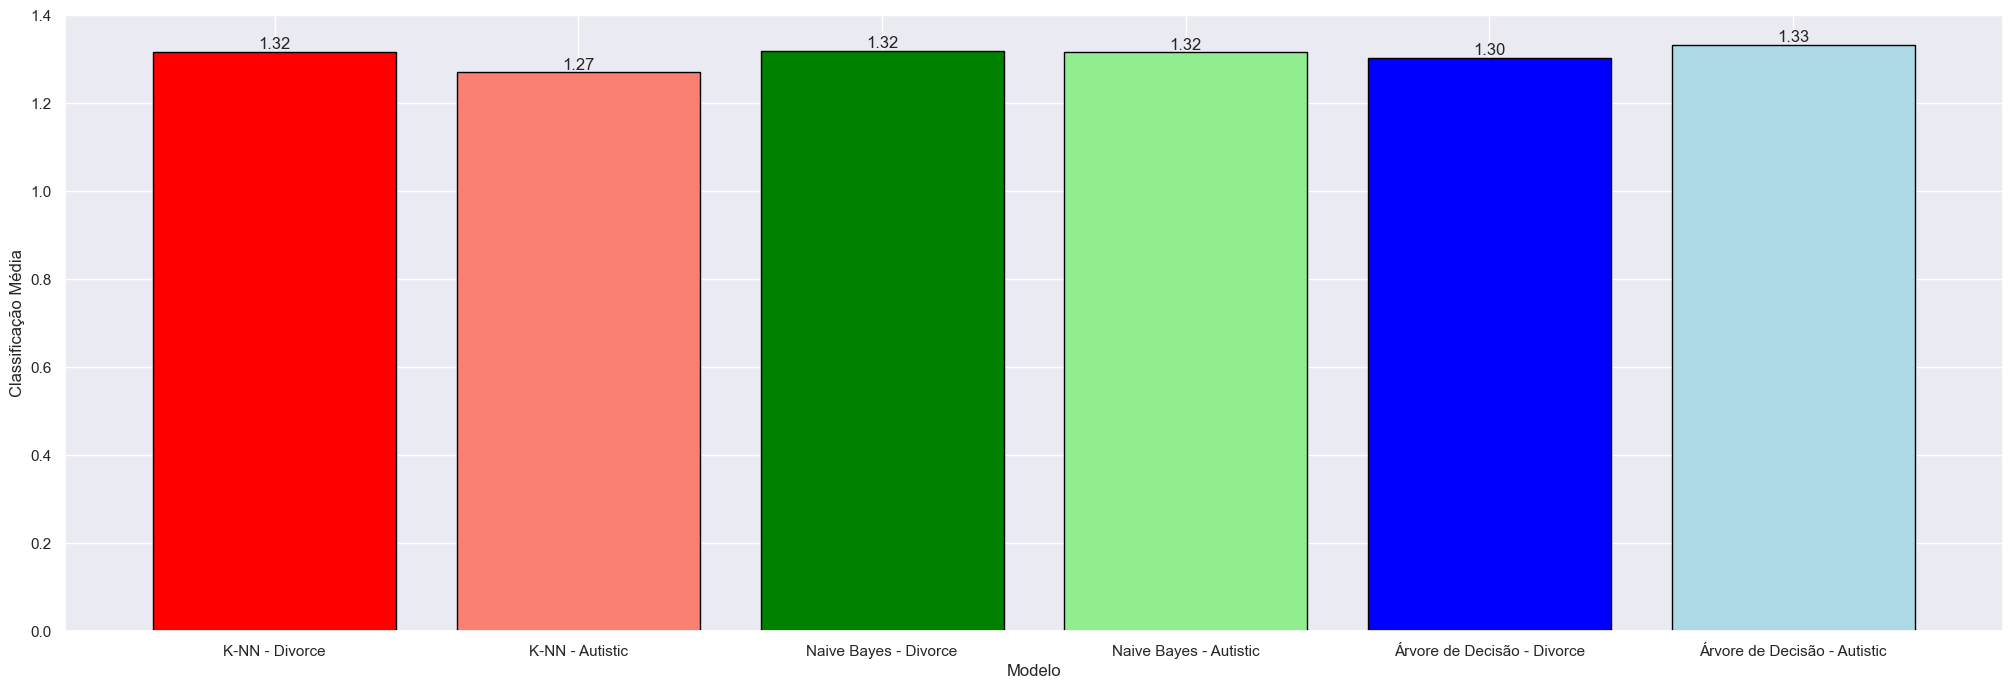

In [614]:
# Gráfico de barras para comparar a acurácia média dos modelos
classification_knn_d = [estatistic_knn_divorce_3, estatistic_knn_divorce_5, estatistic_knn_divorce_7]
classification_knn_a = [estatistic_knn_autistic_3, estatistic_knn_autistic_5, estatistic_knn_autistic_7]
classification_nb_d = [estatistic_nb_divorce_3, estatistic_nb_divorce_5, estatistic_nb_divorce_7]
classification_nb_a = [estatistic_nb_autistic_3, estatistic_nb_autistic_5, estatistic_nb_autistic_7]
classification_dt_d = [estatistic_dt_divorce_3, estatistic_dt_divorce_5, estatistic_dt_divorce_7]
classification_dt_a = [estatistic_dt_autistic_3, estatistic_dt_autistic_5, estatistic_dt_autistic_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
classification = [classification_knn_d, classification_knn_a, classification_nb_d, classification_nb_a, classification_dt_d, classification_dt_a]

# Calcular a média das precisões para cada modelo
mean_classification = [np.mean(acc) for acc in classification]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ax = plt.bar(models, mean_classification, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Classificação Média')

# Adicionar o valor de y sobre cada barra
for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

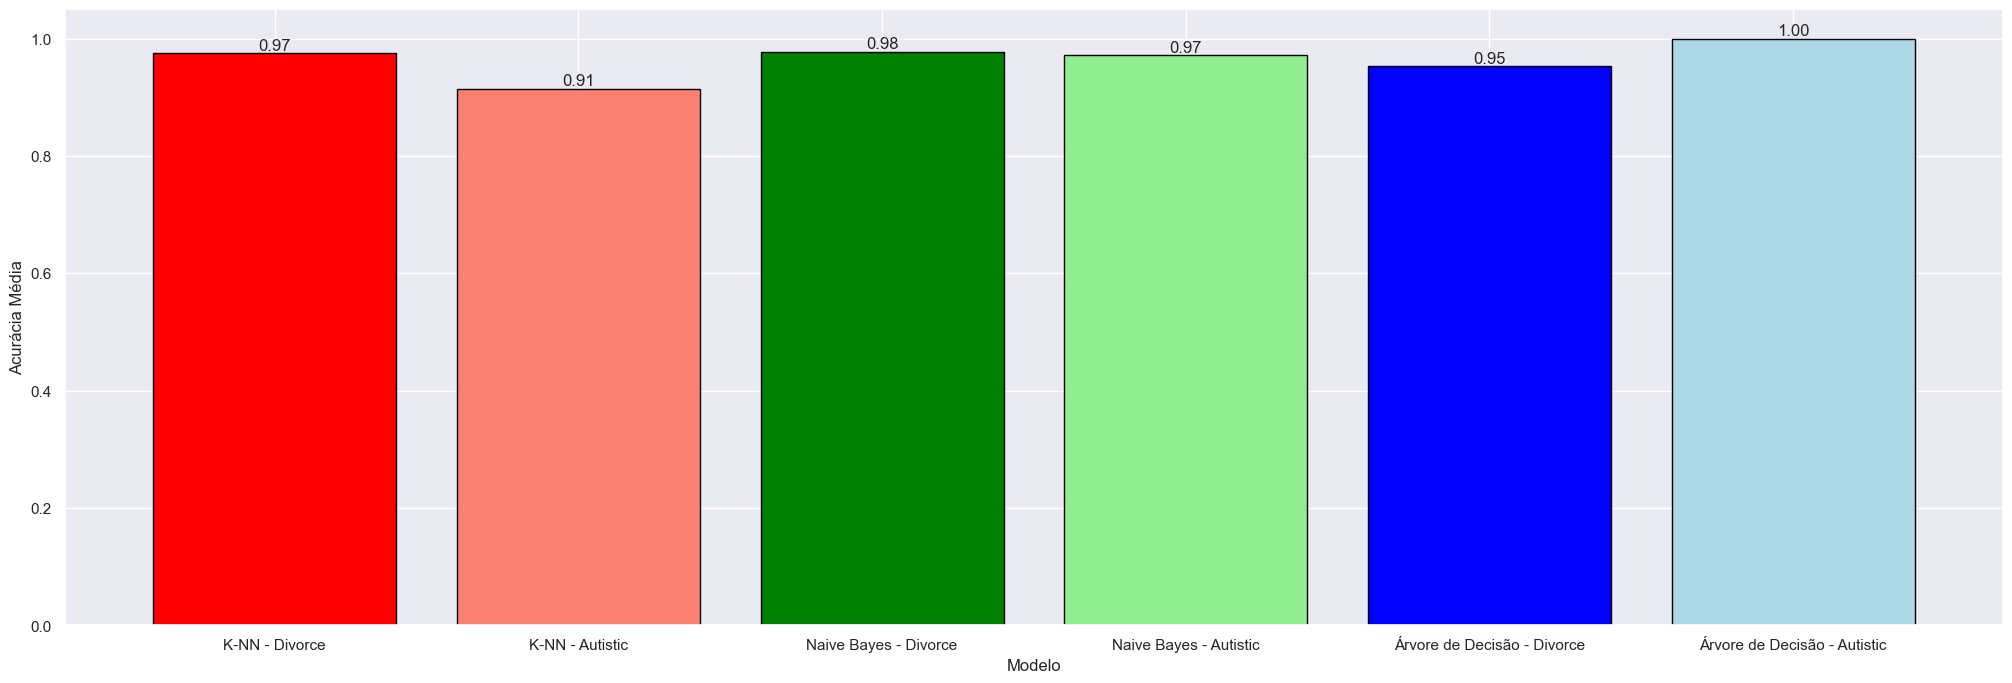

In [615]:
# Gráfico de barras para comparar a acurácia média dos modelos
accuracies_knn_d = [accuracy_scores_divorce_knn_3, accuracy_scores_divorce_knn_5, accuracy_scores_divorce_knn_7]
accuracies_knn_a = [accuracy_scores_autistic_knn_3, accuracy_scores_autistic_knn_5, accuracy_scores_autistic_knn_7]
accuracies_nb_d = [accuracy_scores_divorce_nb_3, accuracy_scores_divorce_nb_5, accuracy_scores_divorce_nb_7]
accuracies_nb_a = [accuracy_scores_autistic_nb_3, accuracy_scores_autistic_nb_5, accuracy_scores_autistic_nb_7]
accuracies_dt_d = [accuracy_scores_divorce_dt_3, accuracy_scores_divorce_dt_5, accuracy_scores_divorce_dt_7]
accuracies_dt_a = [accuracy_scores_autistic_dt_3, accuracy_scores_autistic_dt_5, accuracy_scores_autistic_dt_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
accuracies = [accuracies_knn_d, accuracies_knn_a, accuracies_nb_d, accuracies_nb_a, accuracies_dt_d, accuracies_dt_a]

# Ajustar o tamanho das listas em accuracies
max_len = max(len(l) for l in accuracies)
accuracies = [l + [np.nan] * (max_len - len(l)) for l in accuracies]

# Calcular a média das precisões para cada modelo
mean_accuracies = [np.mean([np.mean(inner_acc) for inner_acc in acc]) for acc in accuracies]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ay = plt.bar(models, mean_accuracies, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Acurácia Média')

# Adicionar o valor de y sobre cada barra
for rect in ay:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


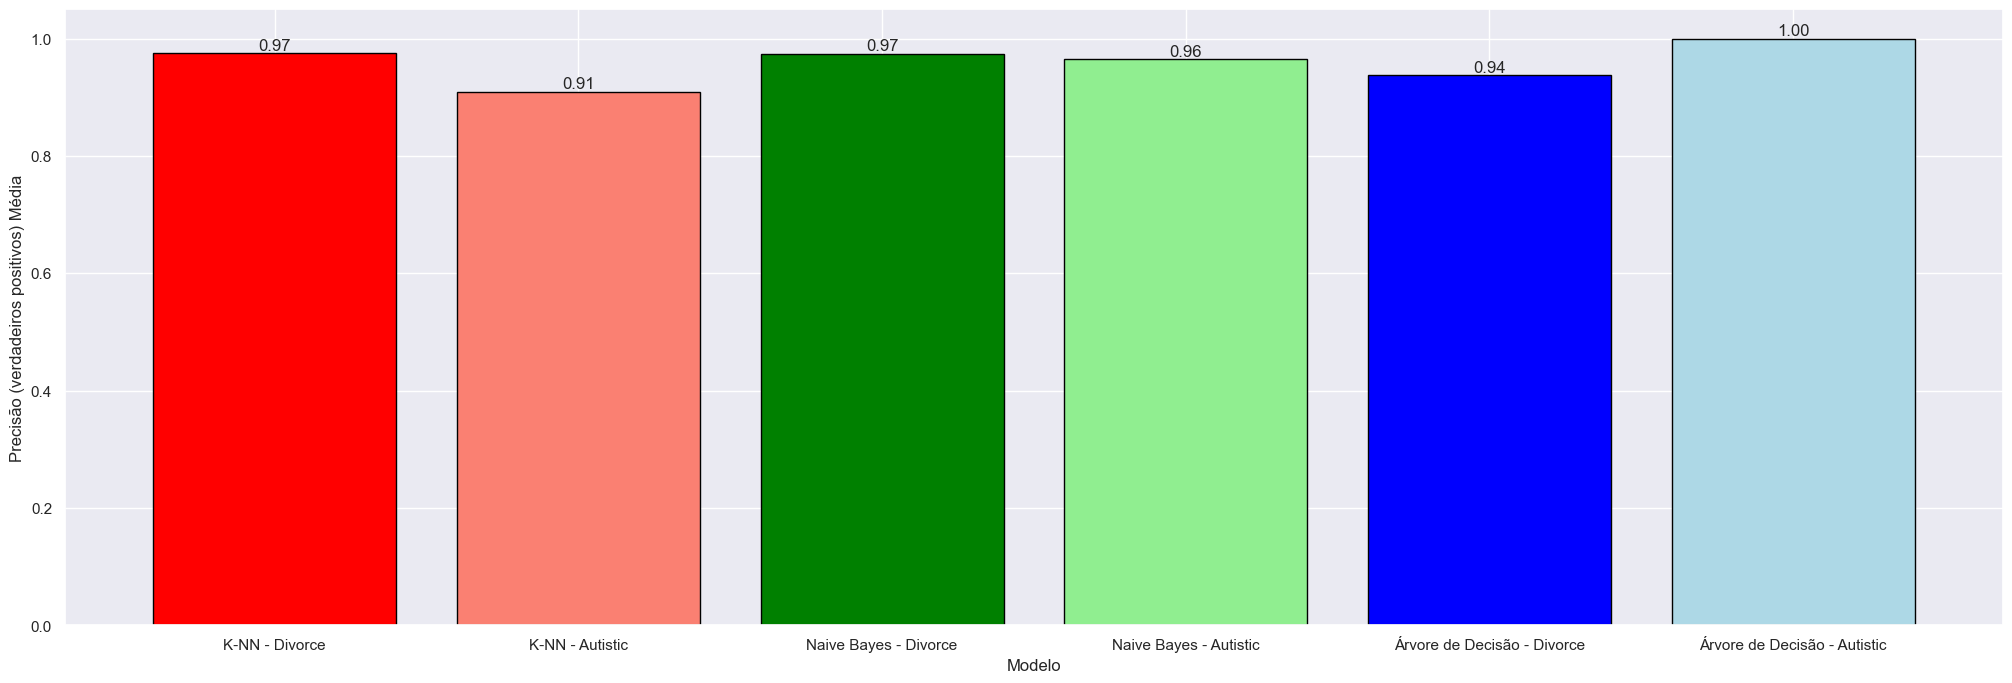

In [616]:
# Gráfico de barras para comparar a acurácia média dos modelos
accuracies_knn_d = [accuracy_scores_divorce_knn_3, accuracy_scores_divorce_knn_5, accuracy_scores_divorce_knn_7]
accuracies_knn_a = [accuracy_scores_autistic_knn_3, accuracy_scores_autistic_knn_5, accuracy_scores_autistic_knn_7]
accuracies_nb_d = [accuracy_scores_divorce_nb_3, accuracy_scores_divorce_nb_5, accuracy_scores_divorce_nb_7]
accuracies_nb_a = [accuracy_scores_autistic_nb_3, accuracy_scores_autistic_nb_5, accuracy_scores_autistic_nb_7]
accuracies_dt_d = [accuracy_scores_divorce_dt_3, accuracy_scores_divorce_dt_5, accuracy_scores_divorce_dt_7]
accuracies_dt_a = [accuracy_scores_autistic_dt_3, accuracy_scores_autistic_dt_5, accuracy_scores_autistic_dt_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
accuracies = [accuracies_knn_d, accuracies_knn_a, accuracies_nb_d, accuracies_nb_a, accuracies_dt_d, accuracies_dt_a]

# Ajustar o tamanho das listas em accuracies
max_len = max(len(l) for l in accuracies)
accuracies = [l + [np.nan] * (max_len - len(l)) for l in accuracies]

# Calcular a média das precisões para cada modelo
mean_accuracies = [np.mean([acc[0]]) for acc in accuracies]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ay = plt.bar(models, mean_accuracies, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Precisão (verdadeiros positivos) Média')

# Adicionar o valor de y sobre cada barra
for rect in ay:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


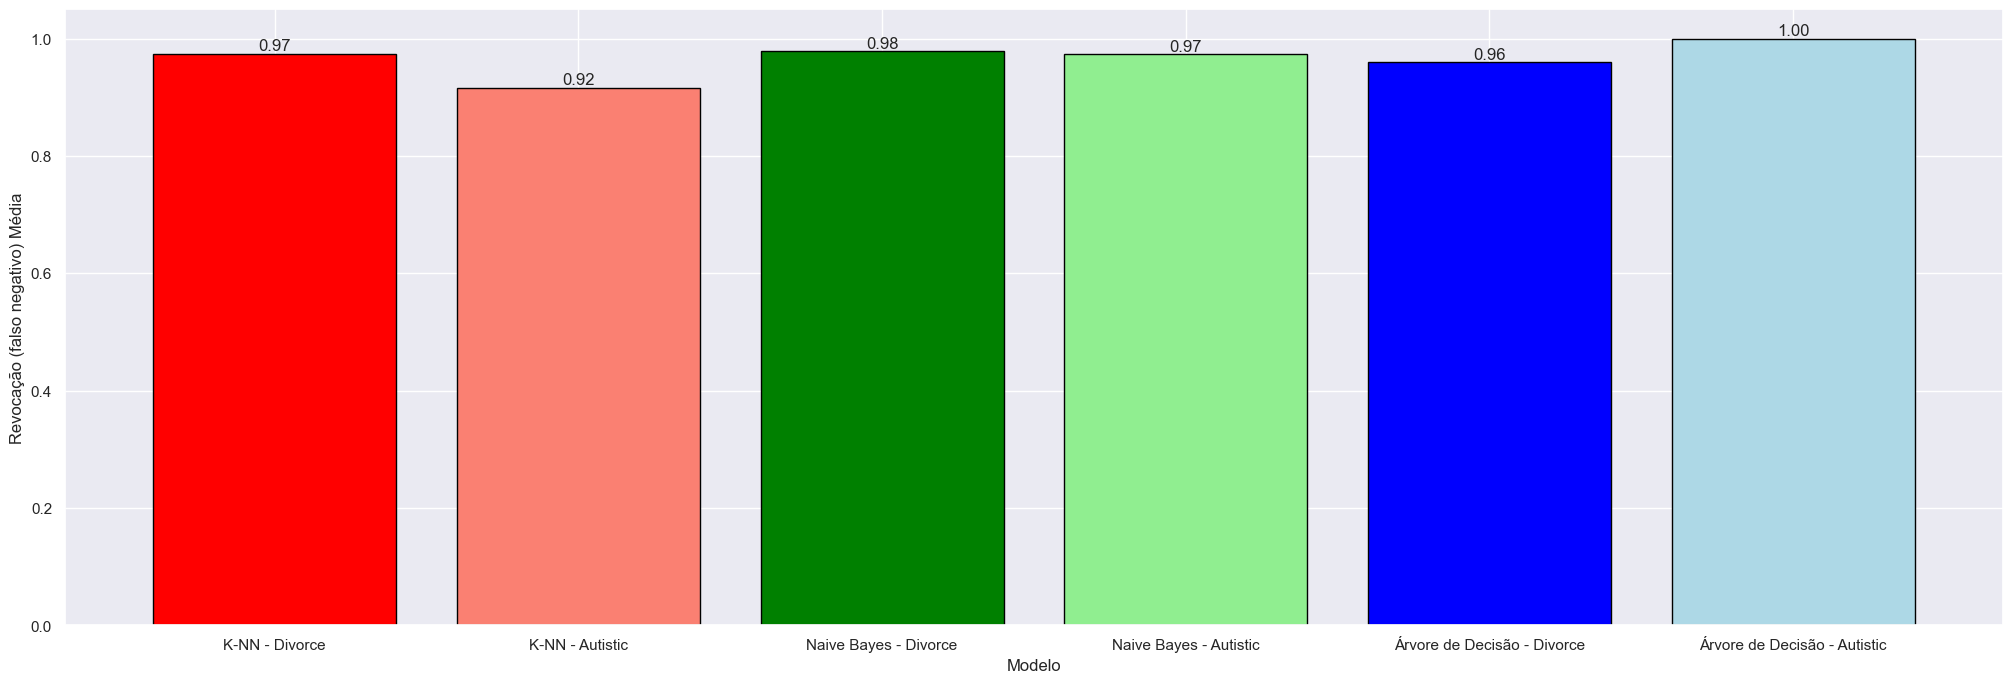

In [617]:
# Gráfico de barras para comparar a acurácia média dos modelos
accuracies_knn_d = [accuracy_scores_divorce_knn_3, accuracy_scores_divorce_knn_5, accuracy_scores_divorce_knn_7]
accuracies_knn_a = [accuracy_scores_autistic_knn_3, accuracy_scores_autistic_knn_5, accuracy_scores_autistic_knn_7]
accuracies_nb_d = [accuracy_scores_divorce_nb_3, accuracy_scores_divorce_nb_5, accuracy_scores_divorce_nb_7]
accuracies_nb_a = [accuracy_scores_autistic_nb_3, accuracy_scores_autistic_nb_5, accuracy_scores_autistic_nb_7]
accuracies_dt_d = [accuracy_scores_divorce_dt_3, accuracy_scores_divorce_dt_5, accuracy_scores_divorce_dt_7]
accuracies_dt_a = [accuracy_scores_autistic_dt_3, accuracy_scores_autistic_dt_5, accuracy_scores_autistic_dt_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
accuracies = [accuracies_knn_d, accuracies_knn_a, accuracies_nb_d, accuracies_nb_a, accuracies_dt_d, accuracies_dt_a]

# Ajustar o tamanho das listas em accuracies
max_len = max(len(l) for l in accuracies)
accuracies = [l + [np.nan] * (max_len - len(l)) for l in accuracies]

# Calcular a média das precisões para cada modelo
mean_accuracies = [np.mean([acc[1]]) for acc in accuracies]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ay = plt.bar(models, mean_accuracies, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Revocação (falso negativo) Média')

# Adicionar o valor de y sobre cada barra
for rect in ay:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


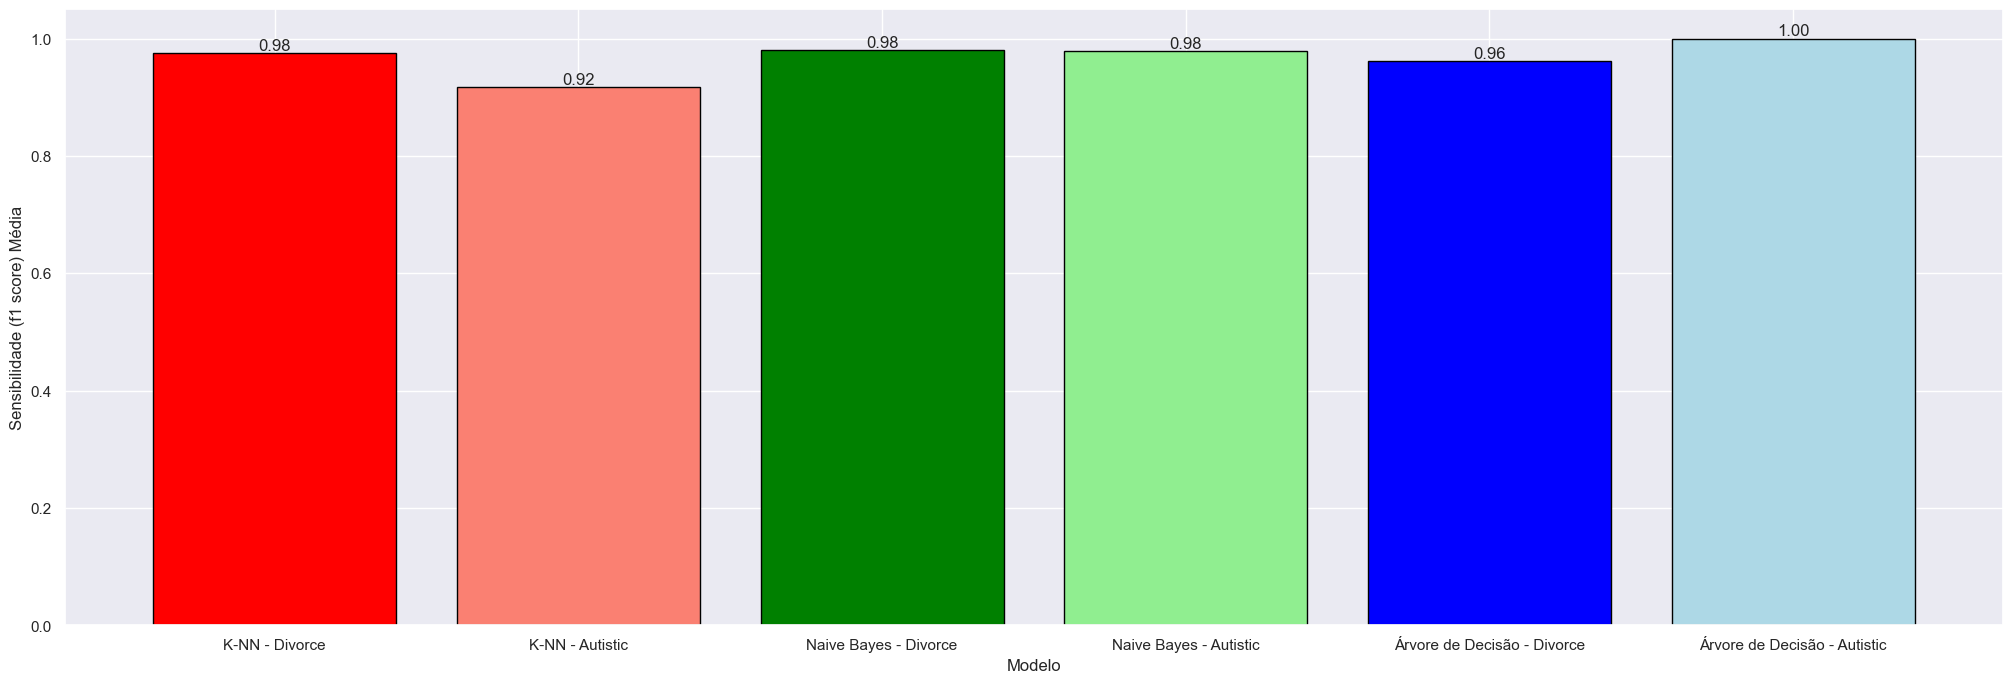

In [618]:
# Gráfico de barras para comparar a acurácia média dos modelos
accuracies_knn_d = [accuracy_scores_divorce_knn_3, accuracy_scores_divorce_knn_5, accuracy_scores_divorce_knn_7]
accuracies_knn_a = [accuracy_scores_autistic_knn_3, accuracy_scores_autistic_knn_5, accuracy_scores_autistic_knn_7]
accuracies_nb_d = [accuracy_scores_divorce_nb_3, accuracy_scores_divorce_nb_5, accuracy_scores_divorce_nb_7]
accuracies_nb_a = [accuracy_scores_autistic_nb_3, accuracy_scores_autistic_nb_5, accuracy_scores_autistic_nb_7]
accuracies_dt_d = [accuracy_scores_divorce_dt_3, accuracy_scores_divorce_dt_5, accuracy_scores_divorce_dt_7]
accuracies_dt_a = [accuracy_scores_autistic_dt_3, accuracy_scores_autistic_dt_5, accuracy_scores_autistic_dt_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
accuracies = [accuracies_knn_d, accuracies_knn_a, accuracies_nb_d, accuracies_nb_a, accuracies_dt_d, accuracies_dt_a]

# Ajustar o tamanho das listas em accuracies
max_len = max(len(l) for l in accuracies)
accuracies = [l + [np.nan] * (max_len - len(l)) for l in accuracies]

# Calcular a média das precisões para cada modelo
mean_accuracies = [np.mean([acc[2]]) for acc in accuracies]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ay = plt.bar(models, mean_accuracies, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Sensibilidade (f1 score) Média')

# Adicionar o valor de y sobre cada barra
for rect in ay:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


In [619]:
# Gráfico de barras para comparar a acurácia média dos modelos
accuracies_knn_d = [accuracy_scores_divorce_knn_3, accuracy_scores_divorce_knn_5, accuracy_scores_divorce_knn_7]
accuracies_knn_a = [accuracy_scores_autistic_knn_3, accuracy_scores_autistic_knn_5, accuracy_scores_autistic_knn_7]
accuracies_nb_d = [accuracy_scores_divorce_nb_3, accuracy_scores_divorce_nb_5, accuracy_scores_divorce_nb_7]
accuracies_nb_a = [accuracy_scores_autistic_nb_3, accuracy_scores_autistic_nb_5, accuracy_scores_autistic_nb_7]
accuracies_dt_d = [accuracy_scores_divorce_dt_3, accuracy_scores_divorce_dt_5, accuracy_scores_divorce_dt_7]
accuracies_dt_a = [accuracy_scores_autistic_dt_3, accuracy_scores_autistic_dt_5, accuracy_scores_autistic_dt_7]
models = ['K-NN - Divorce', 'K-NN - Autistic', 'Naive Bayes - Divorce', 'Naive Bayes - Autistic', 'Árvore de Decisão - Divorce', 'Árvore de Decisão - Autistic']
accuracies = [accuracies_knn_d, accuracies_knn_a, accuracies_nb_d, accuracies_nb_a, accuracies_dt_d, accuracies_dt_a]

# Ajustar o tamanho das listas em accuracies
max_len = max(len(l) for l in accuracies)
accuracies = [l + [np.nan] * (max_len - len(l)) for l in accuracies]

# Calcular a média das precisões para cada modelo
mean_accuracies = [np.mean([acc[3]]) for acc in accuracies]

# Definir as cores para cada barra
colors = ['red', 'salmon', 'green', 'lightgreen', 'blue', 'lightblue']

# Criar o gráfico de barras
ay = plt.bar(models, mean_accuracies, color=colors, edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Curva ROC (área sobre a cruva) Média')

# Adicionar o valor de y sobre cada barra
for rect in ay:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


IndexError: list index out of range

### Conclusão

Embora o gráfico do valor médio da curva ROC, por alguma razaão desconhecida, não tenha sido gerado. É perceptível pelos valores de verdadeiros positvos, principalemtente para ambas as bases de dados, e para falsos negativos, que o melhor modelo foi a árvore de decisão. Entretanto, gostaria de ressaltar que esse modelo também é o mais senssível de todos, e que nem todos os ajustes estiveram perfeitos para ele, como o de distribuição dos dados da base de divórcio e os ruídos da base altismo. Por isso, acredito que para ambas as bases, o melhor pipeline foi da Naive Bayes com 5 dobras (folds), evitando underfitting e hiperfitting.